In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графиков для лучшего отображения
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
url=""
# Загрузите данные
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Показать первые несколько строк данных
# print(train_data.head())
# print(test_data.head())
#df.keys()

In [4]:
df=df.drop(labels=['Id'], axis=1)
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [5]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:

columns_with_nan = df.columns[df.isna().any()]
for column in columns_with_nan:
    if df[column].dtypes != 'object':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace = True)
#Вопрос какие данные нужно удалять? и как это правильно сделать?


In [7]:
columns_with_nan

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
from sklearn.preprocessing import LabelEncoder

In [23]:
l_e=LabelEncoder()
l_e2=LabelEncoder()
l_e3=LabelEncoder()
l_e4=LabelEncoder()
l_e5=LabelEncoder()
l_e6=LabelEncoder()
l_e7=LabelEncoder()
l_e8=LabelEncoder()
l_e9=LabelEncoder()
l_e10=LabelEncoder()
l_e11=LabelEncoder()
l_e12=LabelEncoder()
df['Alley']=l_e.fit_transform(df['Alley'])
df['MSZoning']=l_e2.fit_transform(df['MSZoning'])
df['Street']=l_e3.fit_transform(df['Street'])
df['LotShape']=l_e4.fit_transform(df['LotShape'])
df['LandContour']=l_e5.fit_transform(df['LandContour'])
df['Utilities']=l_e6.fit_transform(df['Utilities'])
df['LotConfig']=l_e7.fit_transform(df['LotConfig'])
df['PoolQC']=l_e8.fit_transform(df['PoolQC'])
df['MiscFeature']=l_e12.fit_transform(df['MiscFeature'])	
df['Fence']=l_e9.fit_transform(df['Fence'])
df['SaleType']=l_e10.fit_transform(df['SaleType'])
df['SaleCondition']=l_e11.fit_transform(df['SaleCondition'])
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,2,65.0,8450,2,2,2,2,2,2,...,0,2,2,4,0,2,2008,8,4,208500
1,20,2,80.0,9600,2,2,2,2,2,2,...,0,2,2,4,0,5,2007,8,4,181500
2,60,2,68.0,11250,2,2,2,2,2,2,...,0,2,2,4,0,9,2008,8,4,223500
3,70,2,60.0,9550,2,2,2,2,2,2,...,0,2,2,4,0,2,2006,8,0,140000
4,60,2,84.0,14260,2,2,2,2,2,2,...,0,2,2,4,0,12,2008,8,4,250000


/var/folders/fn/q7mwt3nx0q9435yhnjxdjs_00000gn/T/ipykernel_34268/3595642142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


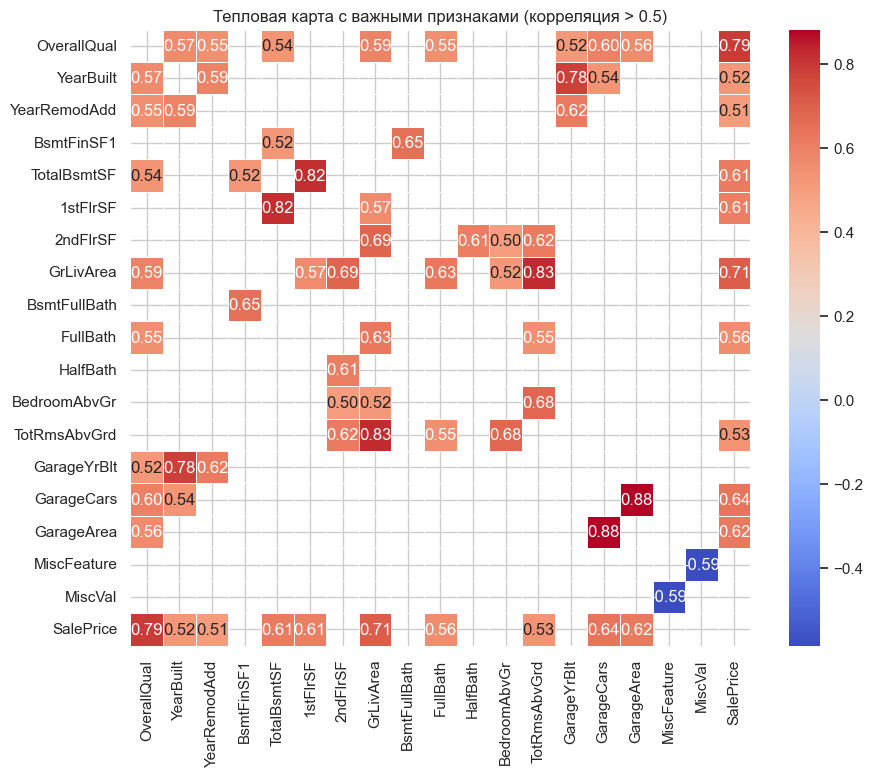

In [24]:
# Рассчитать корреляционную матрицу
correlation_matrix = df.corr()

# Установить порог для важной корреляции
threshold = 0.5

# Отфильтровать только признаки с высокой корреляцией
high_correlation = correlation_matrix[(correlation_matrix.abs() >= threshold) & (correlation_matrix != 1.0)]

# Удалить столбцы и строки, у которых все значения NaN (нет значимых корреляций)
filtered_corr = high_correlation.dropna(how='all').dropna(axis=1, how='all')

# Построить тепловую карту для отфильтрованных признаков
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Показать график
plt.title('Тепловая карта с важными признаками (корреляция > 0.5)')
plt.show()

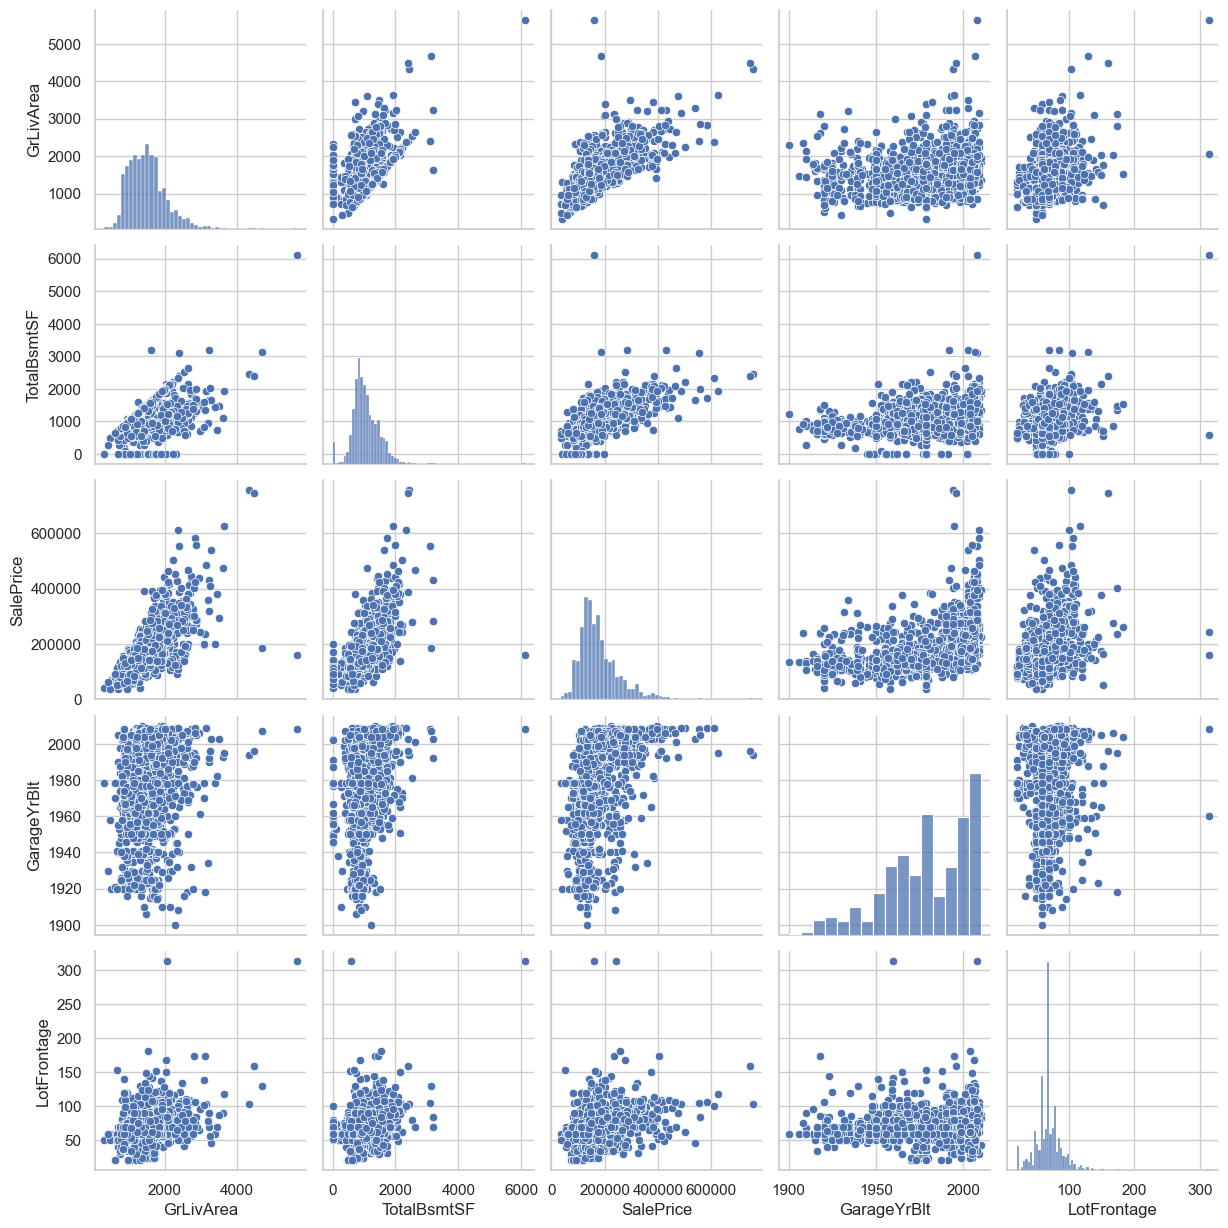

In [46]:
# Selecting numeric columns for the pairplot
selected_columns = ['GrLivArea', 'TotalBsmtSF', 'SalePrice','GarageYrBlt','LotFrontage']  # Add more columns as needed
#selected_columns = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       # 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       # 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       # 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       # 'MiscFeature']
# Pairplot visualization
sns.pairplot(df[selected_columns])
plt.show()


FireplaceQu     690
GarageFinish     81
GarageQual       81
GarageCond       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
dtype: int64


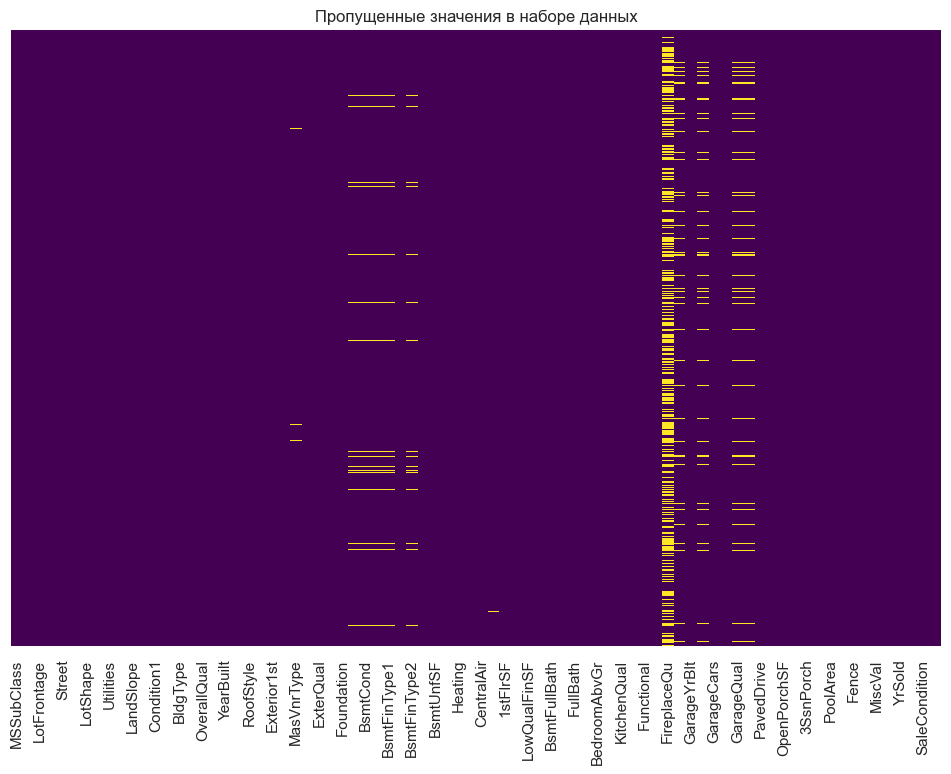

In [32]:
#Проверка на пропущенные значения
# Проверка количества пропущенных значений в каждом столбце

missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

# Визуализация пропущенных значений с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Пропущенные значения в наборе данных")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=[]
y=[]
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
#X=df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','MSSubClass',	'MSZoning',	'LotFrontage',	'LotArea',	'Street',	'Alley',	'LotShape',	'LandContour',	'Utilities',	'LotConfig',	'PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType']]

y = df['SalePrice']
# print(y.isnull()==True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#array[0]= train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2)
# print('X_train:', X_train.shape)
# print('X_test:', X_test.shape)
# print('y_train:', y_train.shape)
# print('y_test:', y_test.shape)

# print(len(x),len(y))
# print(type(X),type(y))

# Создание объекта линейной регрессии
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Коэффициент детерминации (R²): {r2}')


y_Predict = model.predict()

Среднеквадратичная ошибка (MSE): 1602914819.4439092
Коэффициент детерминации (R²): 0.7910239048318477


In [ ]:
pip install matplotlib  
pip install numpy
